# AS07 Collocation for finding enthusiastic commentors

在文字探勘的第二單元我們介紹了Collocation來找出significant word pair。同樣的方法，我也可以把他改造來找出，在討論板上哪兩個人老是一起出現。你可以想像說在一個討論板中，某一主題一出來，某些人就會突然冒出來開始Comment。並且A下了Comment後，很快的B也會跟著下Comment。我們可以用Collocation的概念來找出這些總是一起出現的Commentors。但社會科學會把這樣的關係稱為Cooccurrence（共現）。

## Loading data

In [3]:
# colab
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

--2021-05-10 04:39:31--  https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat [following]
--2021-05-10 04:39:31--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992132 (969K) [application/octet-stream]
Saving to: ‘pttpost_20210509_n178.dat’

pttpost_20210509_n1 100%[===================>] 968.88K  --.-KB/s    in 0.06s   

2021-05-10 04:39:31 (15.9 MB/s) - ‘pttpost_20210509_n178.dat’ saved [992132/99213

In [1]:
# jupyterlab
import pickle
with open("../data/pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

In [2]:
print(len(all_post))
print(all_post[0])
print("-"*80)
for comment in all_post[5]['comments']:
    print(comment)

178
{'author': 's72005ming (QQ)', 'authorid': 's72005ming', 'nickname': 'QQ', 'link': 'https://www.ptt.cc/bbs/Gossiping/M.1620528765.A.DBD.html', 'title': '[問卦] 美國會研究因武漢肺炎死亡的人種嗎？', 'timestamp': 'Sun May  9 10:52:43 2021', 'content': '美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\n以美國這麼重視人權和觀感的國家\n\n會有研究因武漢肺炎死亡人種的論文嗎？\n\n\n好奇如果有哪一個人種死亡數最少\n\n我猜是華裔就是了！\n\n聽說疫情發生後一堆華裔老人連出門剪頭髮都不敢！--', 'comments': [{'tag': '推 ', 'userid': 'shiriri', 'content': ': 有很多了 黑人跟拉丁裔比較高 亞裔跟白人差不多', 'timestamp': ' 05/09 10:59\n'}, {'tag': '→ ', 'userid': 'HELLDIVER', 'content': ': 有趣的是 剛開始大爆發時 還說亞洲人比較會得武漢病毒', 'timestamp': ' 05/09 11:01\n'}, {'tag': '噓 ', 'userid': 'redsa12', 'content': ': 網路即時數據就都有按人種按年齡區分的數據了...', 'timestamp': ' 05/09 11:06\n'}, {'tag': '→ ', 'userid': 'redsa12', 'content': ': 問之前先估狗好嗎 加油好嗎', 'timestamp': ' 05/09 11:06\n'}]}
--------------------------------------------------------------------------------
{'tag': '推 ', 'userid': 'bignoob', 'content': ': 邊抱怨邊打啊 台灣人的不都這樣', 'timestamp': ' 05/08 14:32\n'}

## 1. Collocation as Cooccurrence
只要在同一則貼文的comments內，我們把任兩個commentor視為有co-comment，也就是Cooccurrence（共現）的關係。請計算出共現於本資料集中，頻率最高的前20對commentor（必須印出Collocation times作為參考）。
```
s72005ming 	 sl11pman 	 450
loham 	 sl11pman 	 450
sl11pman 	 s72005ming 	 450
sl11pman 	 loham 	 450
cwh0105 	 sl11pman 	 360
sl11pman 	 cwh0105 	 360
iampig951753 	 Runna 	 308
Runna 	 iampig951753 	 308
frank355571 	 sl11pman 	 270
sl11pman 	 frank355571 	 270
NICEGOGO 	 sl11pman 	 180
sl11pman 	 NICEGOGO 	 180
sl11pman 	 dawson0130 	 180
sl11pman 	 userlance 	 180
sl11pman 	 carryton 	 180
sl11pman 	 CheshireS 	 180
sl11pman 	 vic4580849 	 180
sl11pman 	 justeit 	 180
dawson0130 	 sl11pman 	 180
userlance 	 sl11pman 	 180
carryton 	 sl11pman 	 180
CheshireS 	 sl11pman 	 180
vic4580849 	 sl11pman 	 180
justeit 	 sl11pman 	 180
psl7634 	 gustavek 	 136
gustavek 	 psl7634 	 136
```

In [3]:
import numpy
commentor = [comment['userid'] for post in all_post for comment in post['comments']]
comment_len = [len(post['comments']) for post in all_post]
comment_index = [0] + list(numpy.cumsum(comment_len)[:-1])
comment_id = list(zip(comment_index, comment_len))
comment_group = [commentor[k:k+v] for k, v in comment_id]

# print(comment_len[:10])
# print(comment_index[:10])
# print(comment_id[0])
# print(comment_group[:3])

from collections import Counter
from itertools import combinations

commentor_pair_count = Counter()

# for comment in comment_group:
#     if len(comment) > 1:
#         combins = list(combinations(comment, 2))
#         for a, b in combins:
#             if a != b:
#                 commentor_pair_count[(a, b)] += 1
#                 commentor_pair_count[(b, a)] += 1

for comment in comment_group:
    if len(comment) > 1:
        for i in range(len(comment)):
            for j in range(i+1, len(comment)):
                c1 = comment[i]
                c2 = comment[j]
                if c1 != c2:
                    commentor_pair_count[(c1, c2)] += 1
                    commentor_pair_count[(c2, c1)] += 1                

for (c1, c2), n in commentor_pair_count.most_common(20):    
    print("%s\t%s\t%d" % (c1, c2, n))

s72005ming	sl11pman	450
sl11pman	s72005ming	450
loham	sl11pman	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	308
Runna	iampig951753	308
frank355571	sl11pman	270
sl11pman	frank355571	270
NICEGOGO	sl11pman	180
sl11pman	NICEGOGO	180
sl11pman	dawson0130	180
dawson0130	sl11pman	180
sl11pman	userlance	180
userlance	sl11pman	180
sl11pman	carryton	180
carryton	sl11pman	180
sl11pman	CheshireS	180
CheshireS	sl11pman	180


## 2. Using MI
MI的計算方式主要是為了要標準化任一字的出現次數和任兩個字的出現次數的影響。請用MI的方式計算出哪兩個人特別常一起出現在同一則貼文的comments中。請用`most_common()`印出M前20大MI的Pairs（必須印出MI值作為參考）。

In [4]:
import math
def mutual_information(p12, p1, p2):
    return math.log2(p12 / (p1 * p2))


commentor_counts = Counter(commentor)
pair_mutual_information_scores = Counter()
bigrams = sum(commentor_pair_count.values())

# for comment in comment_group:
#     for user in comment:
#         commentor_counts[user] += 1

for (c1, c2), n in commentor_pair_count.most_common():
    p12 = n / bigrams
    p1 = commentor_counts[c1] / len(commentor)
    p2 = commentor_counts[c2] / len(commentor)
    pair_mutual_information_scores[(c1, c2)] = mutual_information(p12, p1, p2)

for (c1, c2), MI in pair_mutual_information_scores.most_common()[:20]:
    print("%s\t%s\t%d\t%f" % (c1, c2, commentor_pair_count[(c1, c2)], MI))

loham	sl11pman	450	5.515995
sl11pman	loham	450	5.515995
frank355571	sl11pman	270	5.515995
sl11pman	frank355571	270	5.515995
NICEGOGO	sl11pman	180	5.515995
sl11pman	NICEGOGO	180	5.515995
sl11pman	dawson0130	180	5.515995
dawson0130	sl11pman	180	5.515995
sl11pman	CheshireS	180	5.515995
CheshireS	sl11pman	180	5.515995
sl11pman	vic4580849	180	5.515995
vic4580849	sl11pman	180	5.515995
sl11pman	justeit	180	5.515995
justeit	sl11pman	180	5.515995
goddamnhuge	sl11pman	90	5.515995
sl11pman	goddamnhuge	90	5.515995
donyin	sl11pman	90	5.515995
sl11pman	donyin	90	5.515995
crazywiwi	sl11pman	90	5.515995
sl11pman	crazywiwi	90	5.515995


## 3. Cooccurrence with distance
就上述的資料集，我想定義的人與人的關係是「這兩個人老是一前一後出現」，所以我規劃僅計算前後5則以內的comments，也就是說，在同一貼文中，如果A是第一則comment，B是第六則comment，C是第七則，那我不列計A和C的關係，但列計A和B的關係。請用collocation with distance的觀念，計算任兩個comment間的平均距離，並用`most_comment()`列印出平均距離最短的前二十對commentors。

In [5]:
import numpy
commentor = [comment['userid'] for post in all_post for comment in post['comments']]
comment_len = [len(post['comments']) for post in all_post]
comment_index = [0] + list(numpy.cumsum(comment_len)[:-1])
comment_id = list(zip(comment_index, comment_len))
comment_group = [commentor[k:k+v] for k, v in comment_id]

window_size = 5 # 幾則以內 window_size 就多少
commentor_distance_count = Counter()
commentor_pair_count = Counter()

for comment in comment_group:
    if len(comment) > 1:
        for i in range(len(comment) - 1):
            for distance in range(1, window_size + 1):
                if i + distance < len(comment):
                    (c1, c2) = (comment[i], comment[i + distance])
                    if c1 != c2:
                        commentor_distance_count[(c1, c2, distance)] += 1
                        commentor_pair_count[(c1, c2)] += 1

pair_mean_distances = Counter()

for (c1, c2, distance), n in commentor_distance_count.most_common():
    if commentor_pair_count[(c1, c2)] > 1:
        pair_mean_distances[(c1, c2)] += distance*n / commentor_pair_count[(c1, c2)] # 平均距離等於累加(該詞對的各特定距離*對數)/該詞對的總對數

for (c1, c2), mean_distance in pair_mean_distances.most_common()[-20:]:
    print("%s\t%s\t%f\t%d"%(c1, c2, mean_distance, commentor_pair_count[(c1, c2)]))

peter789	b3030	1.500000	2
ePaper	chen0625	1.500000	2
chen0625	Qinsect	1.500000	2
kenryu	bar1005	1.500000	2
bar1005	jetalpha	1.500000	2
typeklng	GARRETH	1.500000	2
GARRETH	fenix220	1.500000	2
KaiManSo	nikewang	1.500000	2
gwenwoo	s359999	1.500000	2
a410046	apatosaurus	1.500000	2
apatosaurus	t934140225	1.500000	2
username1	TsmcEE	1.500000	2
bigwun73	yheb88	1.500000	2
ab4daa	cecille	1.500000	2
kingstongyu	ntlutw	1.500000	2
ntlutw	kid1a2b3c4d	1.500000	2
kuan12065	lazarus1121	1.500000	2
Yonhao	jump693	1.000000	2
sellgd	smalltwo	1.000000	2
lazarus1121	tenka92417	1.000000	2


## 4. Drawing collocation network
以下已經提供給你部分不同網絡的視覺化方法和參數調整方法。如果你要看懂每個函式有可能要查閱Networkx的Document，不過這是為了push你去查閱document來理解這些程式碼。

列印出mi值或count值前500大、前1000大、前2000大（會有點吃力）的pairs of user，並觀察該圖型。基於co-commentor的網絡視覺化，你認為這群co-commenter有什麼特性？請多列印幾種版本，並將你的看法寫在以下的ANSWER後：
### ANSWER:
YOUR ANSWER SHOULD BE HERE

答: 我觀察到某些 pairs of user 多以一兩個 commentor 為核心組成一個對話群體，而群體之間幾乎沒有網絡聯繫(感覺這就是同溫層?xd)。此外，規模較大的群體內部除了核心的commentors之外，非主要commentors之間共現的頻率相較來說不高(這樣的現象在MI值或count值前500大與前1000大比較容易觀察)。對於這種規模較大的群體，我認為核心的commentor有兩種留言傾向: 一種是版主(或者說有一定風向能力的意見領袖)帶動討論然後自己回文，另一種是核心commentor只在特定種類的討論區底下留言，而且很少到其他討論區發言。然而，列印出mi值到2000大、3000大...我發現該群體規模在越來越大的同時仍不會與其他有規模的群體產生連結，因此我認為第一種留言傾向應為較常見的留言模式。

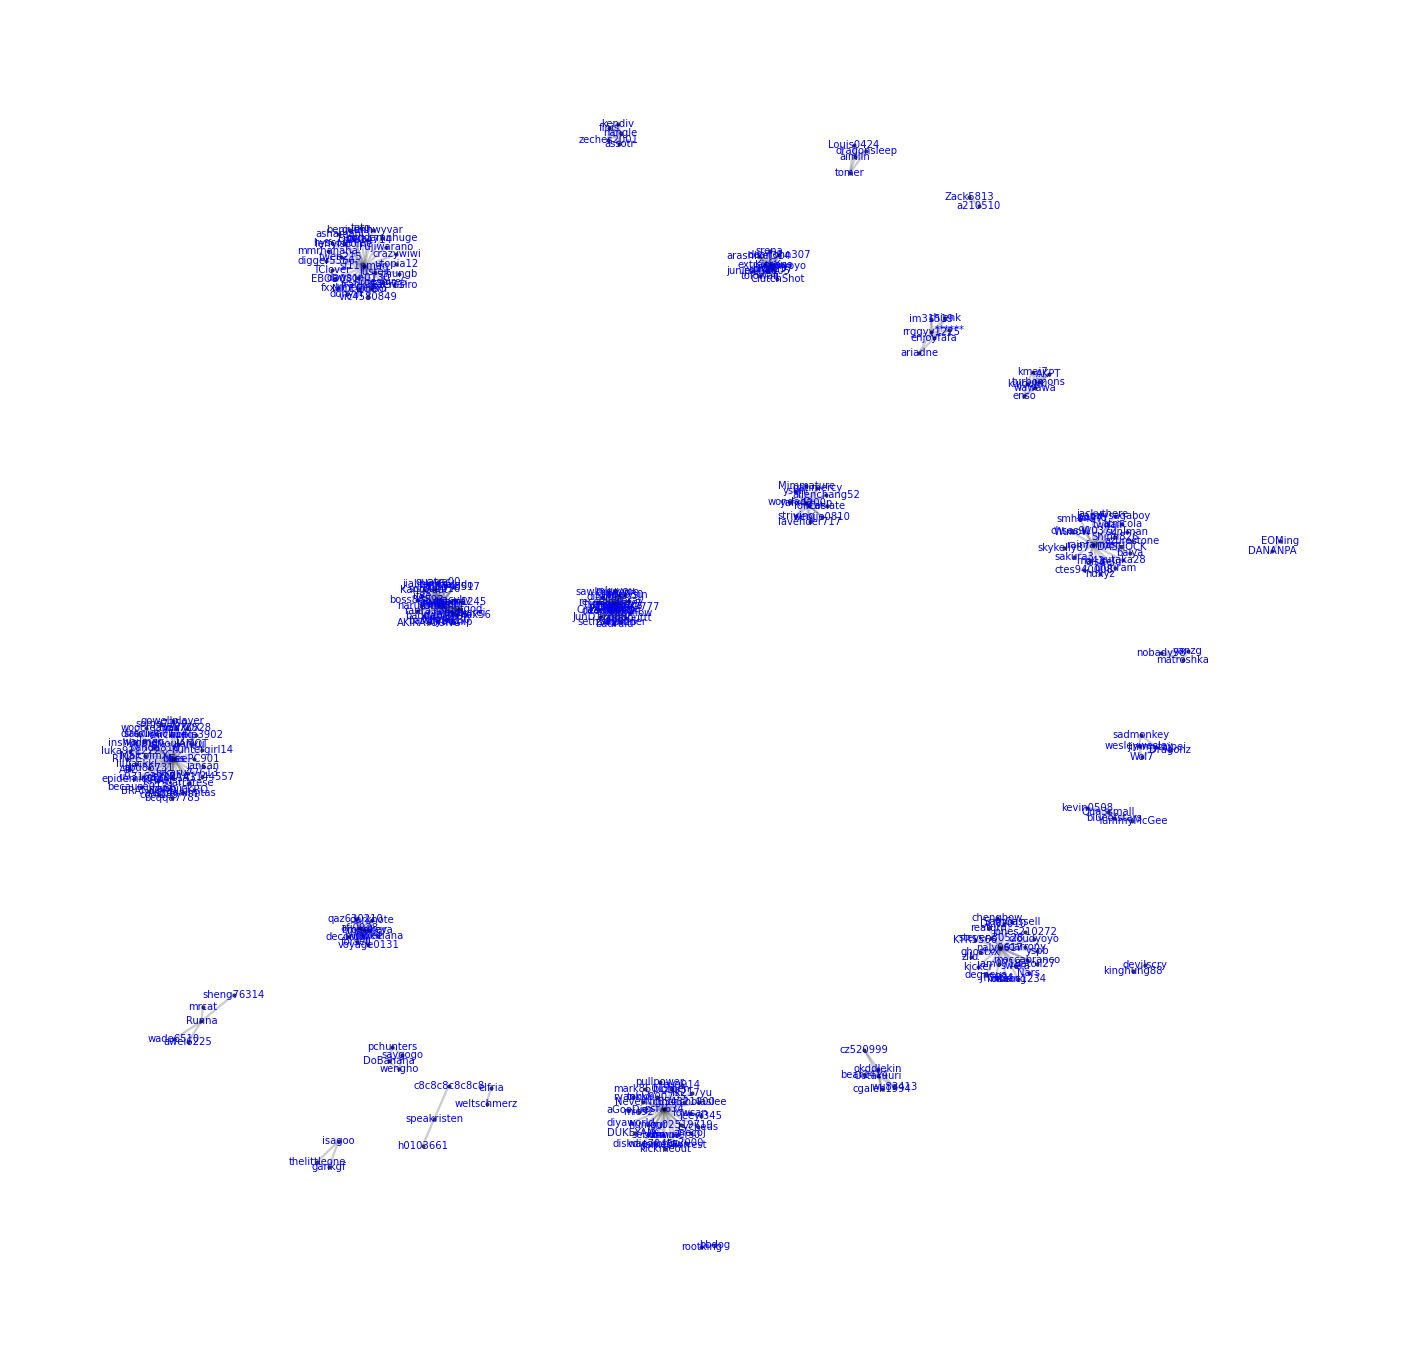

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
li = [(w1, w2, commentor_pair_count[(w1, w2)], mi) for (w1, w2), mi in pair_mutual_information_scores.most_common()]
df = pd.DataFrame.from_records(li, columns =['w1', 'w2', 'count', 'mi'])

import networkx as nx
fig = plt.figure(1, figsize=(30, 30), dpi=60)

G = nx.from_pandas_edgelist(df[:1000],
                            source = 'w1',
                            target = 'w2',
                            edge_attr = 'mi')
widths = nx.get_edge_attributes(G, 'mi')
nodelist = G.nodes()
# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)
pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([w/2 for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

## 也可使用pyvis.network畫畫看

In [18]:
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

## 4. Thinking
這樣的做法是否有助於察覺特定網軍的協同合作？

答: 呈上述，雖不能排各討論區各自存在某些忠實的(只在特定文章議題下留言)活躍用戶，我認為可以嘗試擴大列印前1000、2000、3000、4000mi值去看，隨著數量的擴大，那些有規模的用戶群體之間應該會慢慢產生聯繫。反之，則我覺得便可能是網軍的協同合作。